#### Testing classes for furry-couscous

In [1]:
from fcc_DRs import * # file with dimensionality reduction classes

Using TensorFlow backend.


In [2]:
# read a csv file into a counts_file object
# this one has cells already in the rows, but no cell ID labels
# it does have gene labels in the 0th row position
test1 = counts_file(datafile='inputs/Myeloid_with_IDs.csv', labels=[None,0], cells_axis=0)

In [3]:
# this is already feature-selected to 171 genes
test1.data.shape

(4423, 171)

In [4]:
# this object has a bunch of useful attributes:
test1.data # gives the full data as pd.DataFrame, including cell and gene IDs if available
test1.counts # gives the counts matrix as a np.array
test1.filetype # stores filetype of original input
test1.gene_IDs # this particular dataset has gene IDs

Index(['1100001G20RIK', '1190002H23RIK', '1190007F08RIK', '2210020M01RIK',
       '3110082D06RIK', 'AK084954', 'IGHG1', 'ADSSL1', 'ALAD', 'ALAS1',
       ...
       'TMSB4X', 'TNFAIP2', 'TNNI3', 'TREM3', 'TSPO', 'TYROBP', 'UQCRH',
       'VAMP5', 'VIM', 'ZFPM1'],
      dtype='object', length=171)

In [5]:
# we can take a subset of the cells in our dataframe for quicker analysis
test1.random_subset(n_cells=500)
test1.counts.shape

(500, 171)

In [6]:
# now any manipulations of the counts attribute will be using 500 randomly subsetted cells
# generate PCA object for arcsinh-transformed data with 100 components
%time test1_PCA = fcc_PCA(test1.arcsinh_norm(norm=True, scale=1000), n_components=100)

CPU times: user 75.7 ms, sys: 15.1 ms, total: 90.7 ms
Wall time: 63 ms


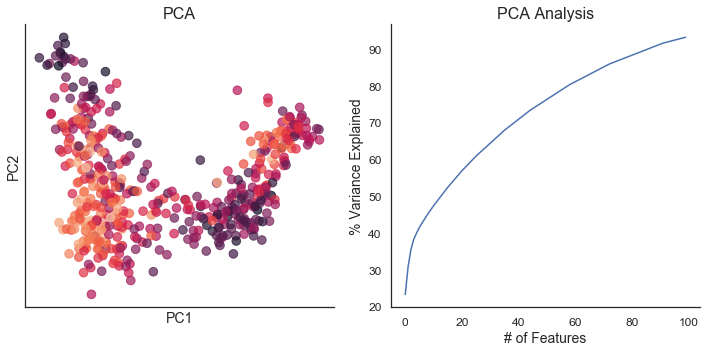

In [7]:
# look at the results
test1_PCA.plot()
# plots are colored by point density in 2D space

In [8]:
# now we can perform a t-SNE on the arcsinh-transformed data...
%time test1_tSNE = fcc_tSNE(test1.arcsinh_norm(norm=True, scale=1000), perplexity=30)

CPU times: user 2.32 s, sys: 10.8 ms, total: 2.33 s
Wall time: 2.33 s


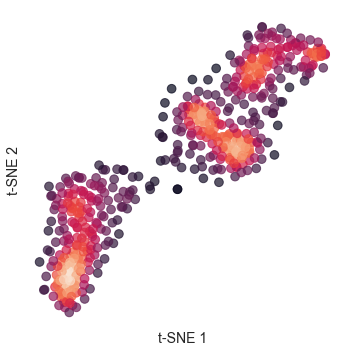

In [9]:
# ... and look at those results
test1_tSNE.plot()

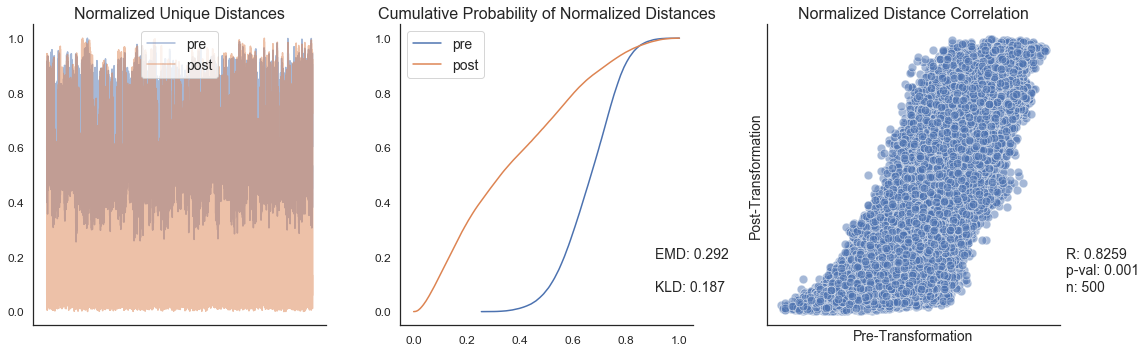

CPU times: user 6.04 s, sys: 463 ms, total: 6.5 s
Wall time: 5.79 s


In [10]:
# each of these DR (dimensionality reduction) objects we've created has a .distance_matrix() method
# we can correlate the Euclidean distances pretty easily:
from fcc_utils import compare_euclid
# let's use another function I wrote to quickly perform statistical tests on the cell-cell distances
%time mantel_stats, EMD, KLD = compare_euclid(pre=test1_PCA.results, post=test1_tSNE.results)

This t-SNE is primed with a PCA with 100 components


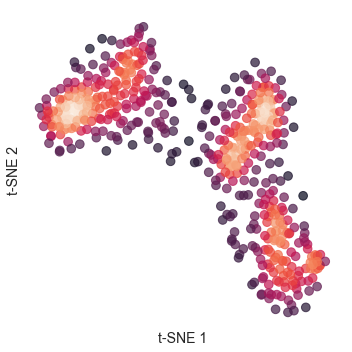

In [11]:
# we could also create a tSNE primed with our PCA results just as easily with the .results attribute of the PCA object
test1_PCA_tSNE = fcc_tSNE(test1_PCA.results, perplexity=30)
# to check how many components we used in the original PCA, just call the object's attribute
print('This t-SNE is primed with a PCA with {} components'.format(test1_PCA.components))
test1_PCA_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124f1c978>)

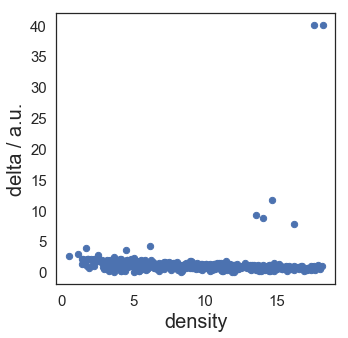

In [12]:
# density-peak clustering is built into the DR objects
# we can look at the decision graph and assign cluster centers 
test1_PCA_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1295b9630>)

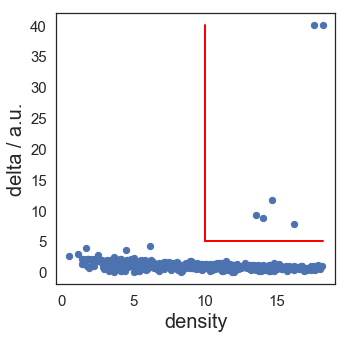

In [13]:
# now, if we assign cutoffs for density and delta, we can generate cluster membership for our tSNE
test1_PCA_tSNE.clu.assign(10, 5)
test1_PCA_tSNE.clu.draw_decision_graph(min_delta=test1_PCA_tSNE.clu.min_delta, min_density=test1_PCA_tSNE.clu.min_density)

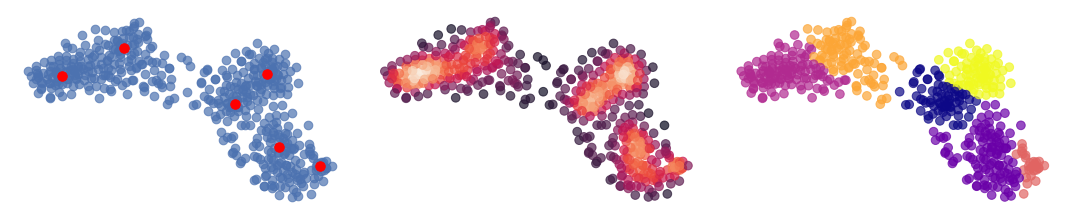

In [14]:
# finally, we can look at the clusters in our tSNE
test1_PCA_tSNE.plot_clusters()

In [15]:
# silhouette score is automatically calculated as well
test1_PCA_tSNE.silhouette_score

0.39240968

In [16]:
# this object has cluster membership for each cell built in now:
test1_PCA_tSNE.clu.membership

array([3, 1, 4, 1, 4, 5, 2, 5, 5, 5, 5, 2, 2, 5, 1, 1, 4, 2, 0, 2, 4, 1,
       2, 4, 5, 1, 1, 5, 2, 1, 4, 5, 0, 5, 2, 2, 2, 2, 5, 3, 2, 2, 1, 1,
       2, 2, 5, 5, 4, 4, 5, 5, 4, 2, 2, 4, 2, 0, 4, 0, 1, 5, 2, 0, 5, 2,
       1, 5, 4, 0, 5, 1, 2, 5, 0, 2, 4, 1, 5, 3, 2, 0, 2, 1, 2, 1, 5, 5,
       1, 5, 2, 1, 3, 2, 1, 2, 4, 2, 2, 2, 5, 1, 4, 1, 1, 1, 1, 4, 2, 4,
       3, 4, 2, 2, 2, 4, 1, 1, 5, 5, 5, 5, 2, 1, 4, 0, 2, 4, 2, 1, 5, 2,
       4, 2, 1, 5, 0, 3, 0, 1, 4, 3, 2, 5, 0, 1, 1, 1, 5, 0, 5, 1, 4, 2,
       1, 5, 1, 1, 0, 4, 0, 1, 0, 1, 0, 2, 2, 0, 1, 3, 5, 4, 2, 0, 2, 4,
       5, 4, 3, 0, 4, 2, 1, 1, 4, 3, 0, 0, 2, 1, 5, 4, 0, 3, 2, 2, 4, 4,
       2, 5, 2, 2, 2, 1, 0, 1, 4, 4, 2, 1, 5, 1, 1, 5, 3, 2, 2, 0, 4, 1,
       4, 4, 2, 2, 1, 4, 1, 4, 2, 0, 4, 4, 2, 2, 4, 1, 4, 3, 1, 1, 5, 5,
       1, 3, 1, 1, 2, 1, 0, 1, 5, 1, 4, 3, 4, 4, 0, 2, 3, 4, 5, 1, 1, 2,
       5, 2, 2, 2, 2, 1, 5, 4, 5, 0, 0, 5, 0, 1, 2, 2, 2, 1, 1, 5, 1, 3,
       2, 5, 4, 4, 0, 5, 1, 1, 0, 5, 1, 2, 4, 1, 2,

Clustering not yet determined. Assign clusters with self.clu.assign().
 'Cluster' object has no attribute 'clusters'


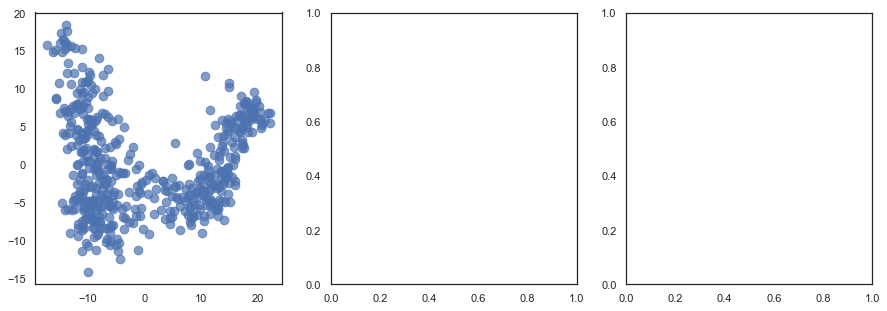

In [17]:
# if you try to plot clusters without assigning cutoffs, it won't work
# let's try with the original PCA object, which we have not clustered yet:
test1_PCA.plot_clusters()